## Wrangling the Billboard Top 100

In [2]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_billboard = pd.read_csv("billboard.csv") #Loading the dataset

In [4]:
df_billboard.head() #Printing top rows to understand the data

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


In [5]:
df_billboard.shape #Dimensions of dataframe

(327895, 13)

In [6]:
df_billboard.info() #Checking na and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              327895 non-null  int64  
 1   url                     327895 non-null  object 
 2   week_id                 327895 non-null  object 
 3   week_position           327895 non-null  int64  
 4   song                    327895 non-null  object 
 5   performer               327895 non-null  object 
 6   song_id                 327895 non-null  object 
 7   instance                327895 non-null  int64  
 8   previous_week_position  295941 non-null  float64
 9   peak_position           327895 non-null  int64  
 10  weeks_on_chart          327895 non-null  int64  
 11  year                    327895 non-null  int64  
 12  week                    327895 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 32.5+ MB


## Part A

In [7]:
#! pip install tabulate
from tabulate import tabulate

In [8]:
top10=df_billboard.groupby(['performer','song']).agg(count=('week_id','count')).reset_index().sort_values(by="count", ascending=False)[:10]

# Display the table with a caption
caption = "Top 10 Most Popular Songs"
print(caption)
print(tabulate(top10, headers='keys', tablefmt='fancy_grid', showindex=False))

Top 10 Most Popular Songs
╒═══════════════════════════════════════════╤═════════════════════════════════════╤═════════╕
│ performer                                 │ song                                │   count │
╞═══════════════════════════════════════════╪═════════════════════════════════════╪═════════╡
│ Imagine Dragons                           │ Radioactive                         │      87 │
├───────────────────────────────────────────┼─────────────────────────────────────┼─────────┤
│ AWOLNATION                                │ Sail                                │      79 │
├───────────────────────────────────────────┼─────────────────────────────────────┼─────────┤
│ The Weeknd                                │ Blinding Lights                     │      76 │
├───────────────────────────────────────────┼─────────────────────────────────────┼─────────┤
│ Jason Mraz                                │ I'm Yours                           │      76 │
├─────────────────────────────────

## Part B

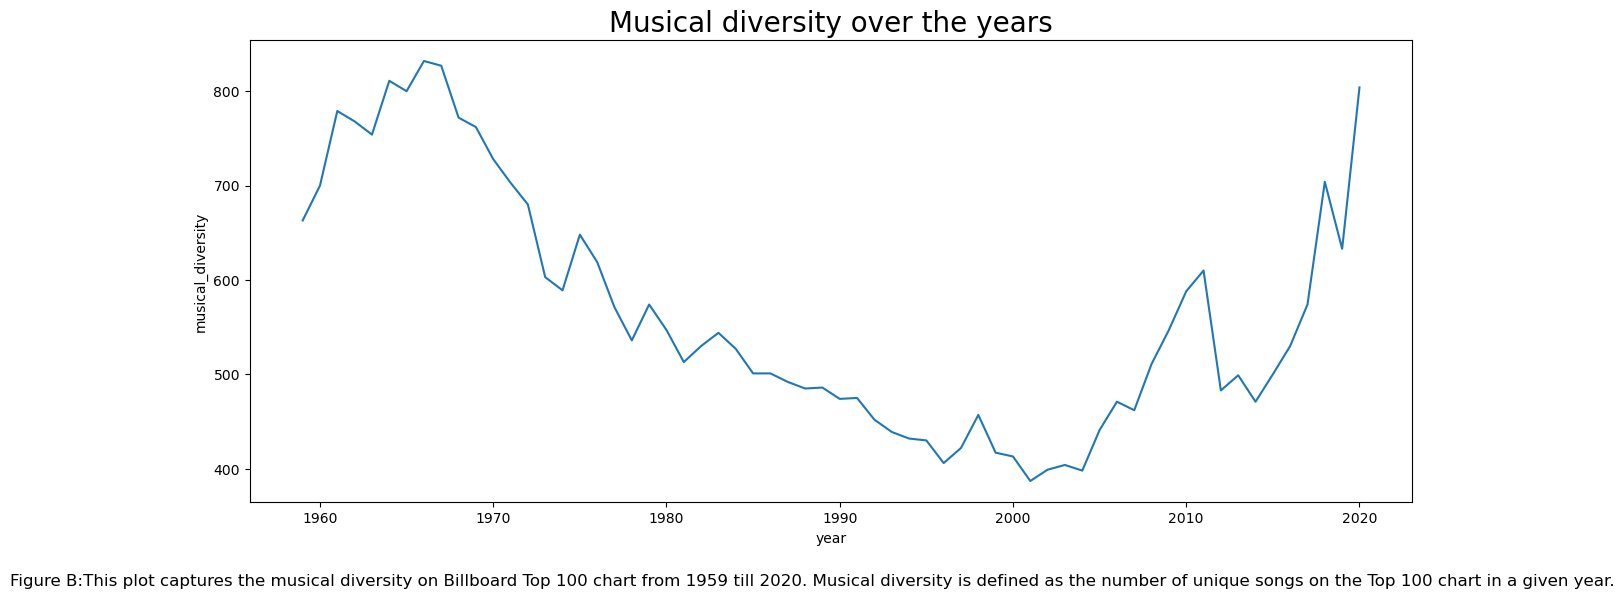

In [10]:
exclusion_years = [1958, 2021] # excluding 1958 and 2021
df_song_year_counts = df_billboard[~df_billboard['year'].isin(exclusion_years)].groupby(['performer','song','year']).agg(count=('week_id','count')).reset_index()
df_musical_diversity = df_song_year_counts.groupby('year').agg(musical_diversity=('song','count')).sort_index().reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(x='year', y='musical_diversity', data=df_musical_diversity)
plt.title("Musical diversity over the years",  fontsize=20)
# Add a caption using plt.figtext
plt.figtext(0.5, -0.03, "Figure B:This plot captures the musical diversity on Billboard Top 100 chart from 1959 till 2020. Musical diversity is defined as the number of unique songs on the Top 100 chart in a given year.", 
            ha='center',  fontsize=12)
plt.show()

After mid 1960's musical diversity was on a decreasing trend till early 2000s and later it started trending up

## Part C

In [11]:
# Identify the ten week hits 
ten_week_hits = df_billboard.groupby(['performer', 'song']).filter(lambda x: len(x) >= 10)
# Count the number of "ten-week hits" per artist
artist_hits = ten_week_hits.groupby('performer')['song'].nunique().reset_index()
artist_hits.columns = ['performer', 'ten_week_hits']
# Filter artists who have at least 30 songs in "ten-week hits"
top_artists = artist_hits[artist_hits['ten_week_hits'] >= 30]
# Sort the artists by the number of ten-week hits in descending order
top_artists = top_artists.sort_values(by='ten_week_hits', ascending=False)
display(top_artists)

,performer,ten_week_hits
1633,Elton John,52
3355,Madonna,44
2856,Kenny Chesney,42
5652,Tim McGraw,39
2833,Keith Urban,36
4857,Stevie Wonder,36
4982,Taylor Swift,35
3567,Michael Jackson,34
4424,Rod Stewart,33
5478,The Rolling Stones,33


C:\Users\grees\AppData\Local\Temp\ipykernel_29728\4218190129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ten_week_hits', y='performer', data=top_artists, palette='viridis')


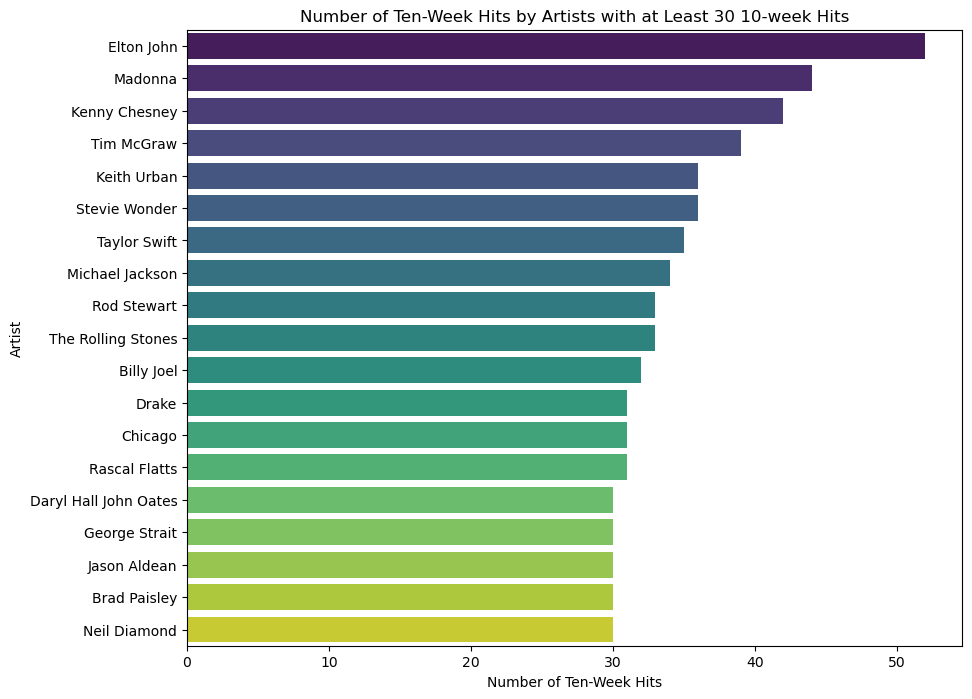

In [12]:
# Plot the results
plt.figure(figsize=(10, 8))
sns.barplot(x='ten_week_hits', y='performer', data=top_artists, palette='viridis')
plt.title('Number of Ten-Week Hits by Artists with at Least 30 10-week Hits')
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Artist')
# Show the plot
plt.show()